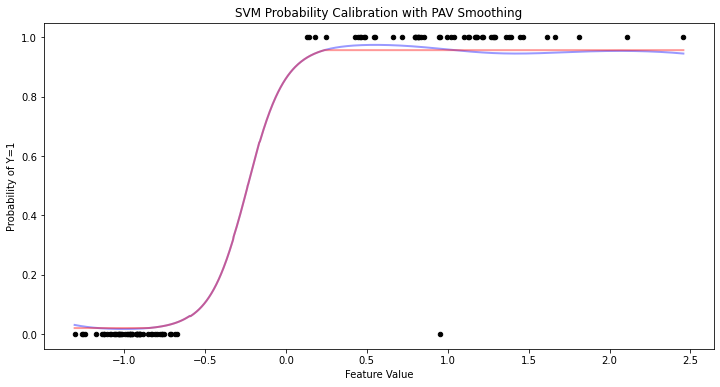

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.isotonic import IsotonicRegression
from sklearn.model_selection import train_test_split
#check the functions
# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 2: Train an SVM classifier
svm = SVC(kernel='rbf', probability=True)
svm.fit(X, y)

# Step 3: Predict probabilities
x_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
y_prob = svm.predict_proba(x_range)[:, 1]

# Step 4: Apply PAV smoothing
ir = IsotonicRegression()
y_prob_smoothed = ir.fit_transform(x_range.flatten(), y_prob)

# Step 5: Visualize the results, emphasizing the smoothing principle
plt.figure(figsize=(12, 6))
plt.plot(x_range, y_prob, label='Original SVM Probabilities', color='blue',alpha = 0.4, lw=2)
plt.plot(x_range, y_prob_smoothed, label='PAV Smoothed Probabilities', color='red',alpha = 0.4, lw=2)

# Highlighting the adjustments - where PAV alters the probabilities

'''for i in range(len(y_prob) - 1):
    if y_prob[i] != y_prob_smoothed[i]:
        plt.plot(x_range[i:i+2], y_prob[i:i+2], color='green', lw=4, alpha=0.3)'''

plt.scatter(X.flatten(), y, marker='o', s=20, color='black', label='Data Points')
plt.title('SVM Probability Calibration with PAV Smoothing')
plt.xlabel('Feature Value')
plt.ylabel('Probability of Y=1')
#plt.legend()
plt.savefig("svm.png",transparent = True)
plt.show()
